<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/AI_W7_17_03_EX(dataframe)_Mastercard_stock_history_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### BAI 2
# Load library
import pandas as pd 
import numpy as np

# Create URL 
url = 'Mastercard_stock_history.csv'

# Load data
data = pd.read_csv(url)

data.head()

correlation = data.corr()
print(correlation)

                  Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.999905  0.999868  0.999785 -0.386222   0.089059   
High          0.999905  1.000000  0.999832  0.999878 -0.384819   0.089429   
Low           0.999868  0.999832  1.000000  0.999904 -0.387965   0.089989   
Close         0.999785  0.999878  0.999904  1.000000 -0.386453   0.090125   
Volume       -0.386222 -0.384819 -0.387965 -0.386453  1.000000  -0.039454   
Dividends     0.089059  0.089429  0.089989  0.090125 -0.039454   1.000000   
Stock Splits -0.004019 -0.003897 -0.003923 -0.003862 -0.004661  -0.001448   

              Stock Splits  
Open             -0.004019  
High             -0.003897  
Low              -0.003923  
Close            -0.003862  
Volume           -0.004661  
Dividends        -0.001448  
Stock Splits      1.000000  


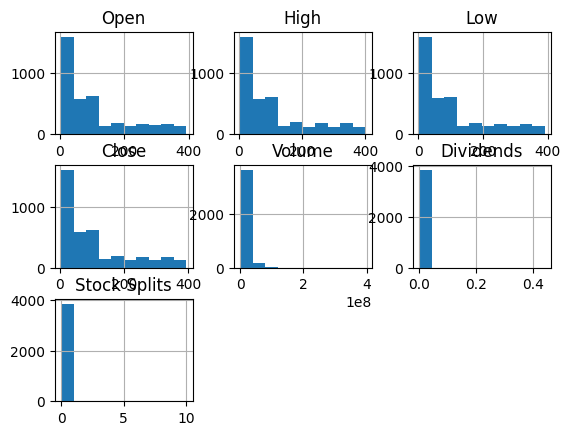

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 

data.hist()
plt.show()

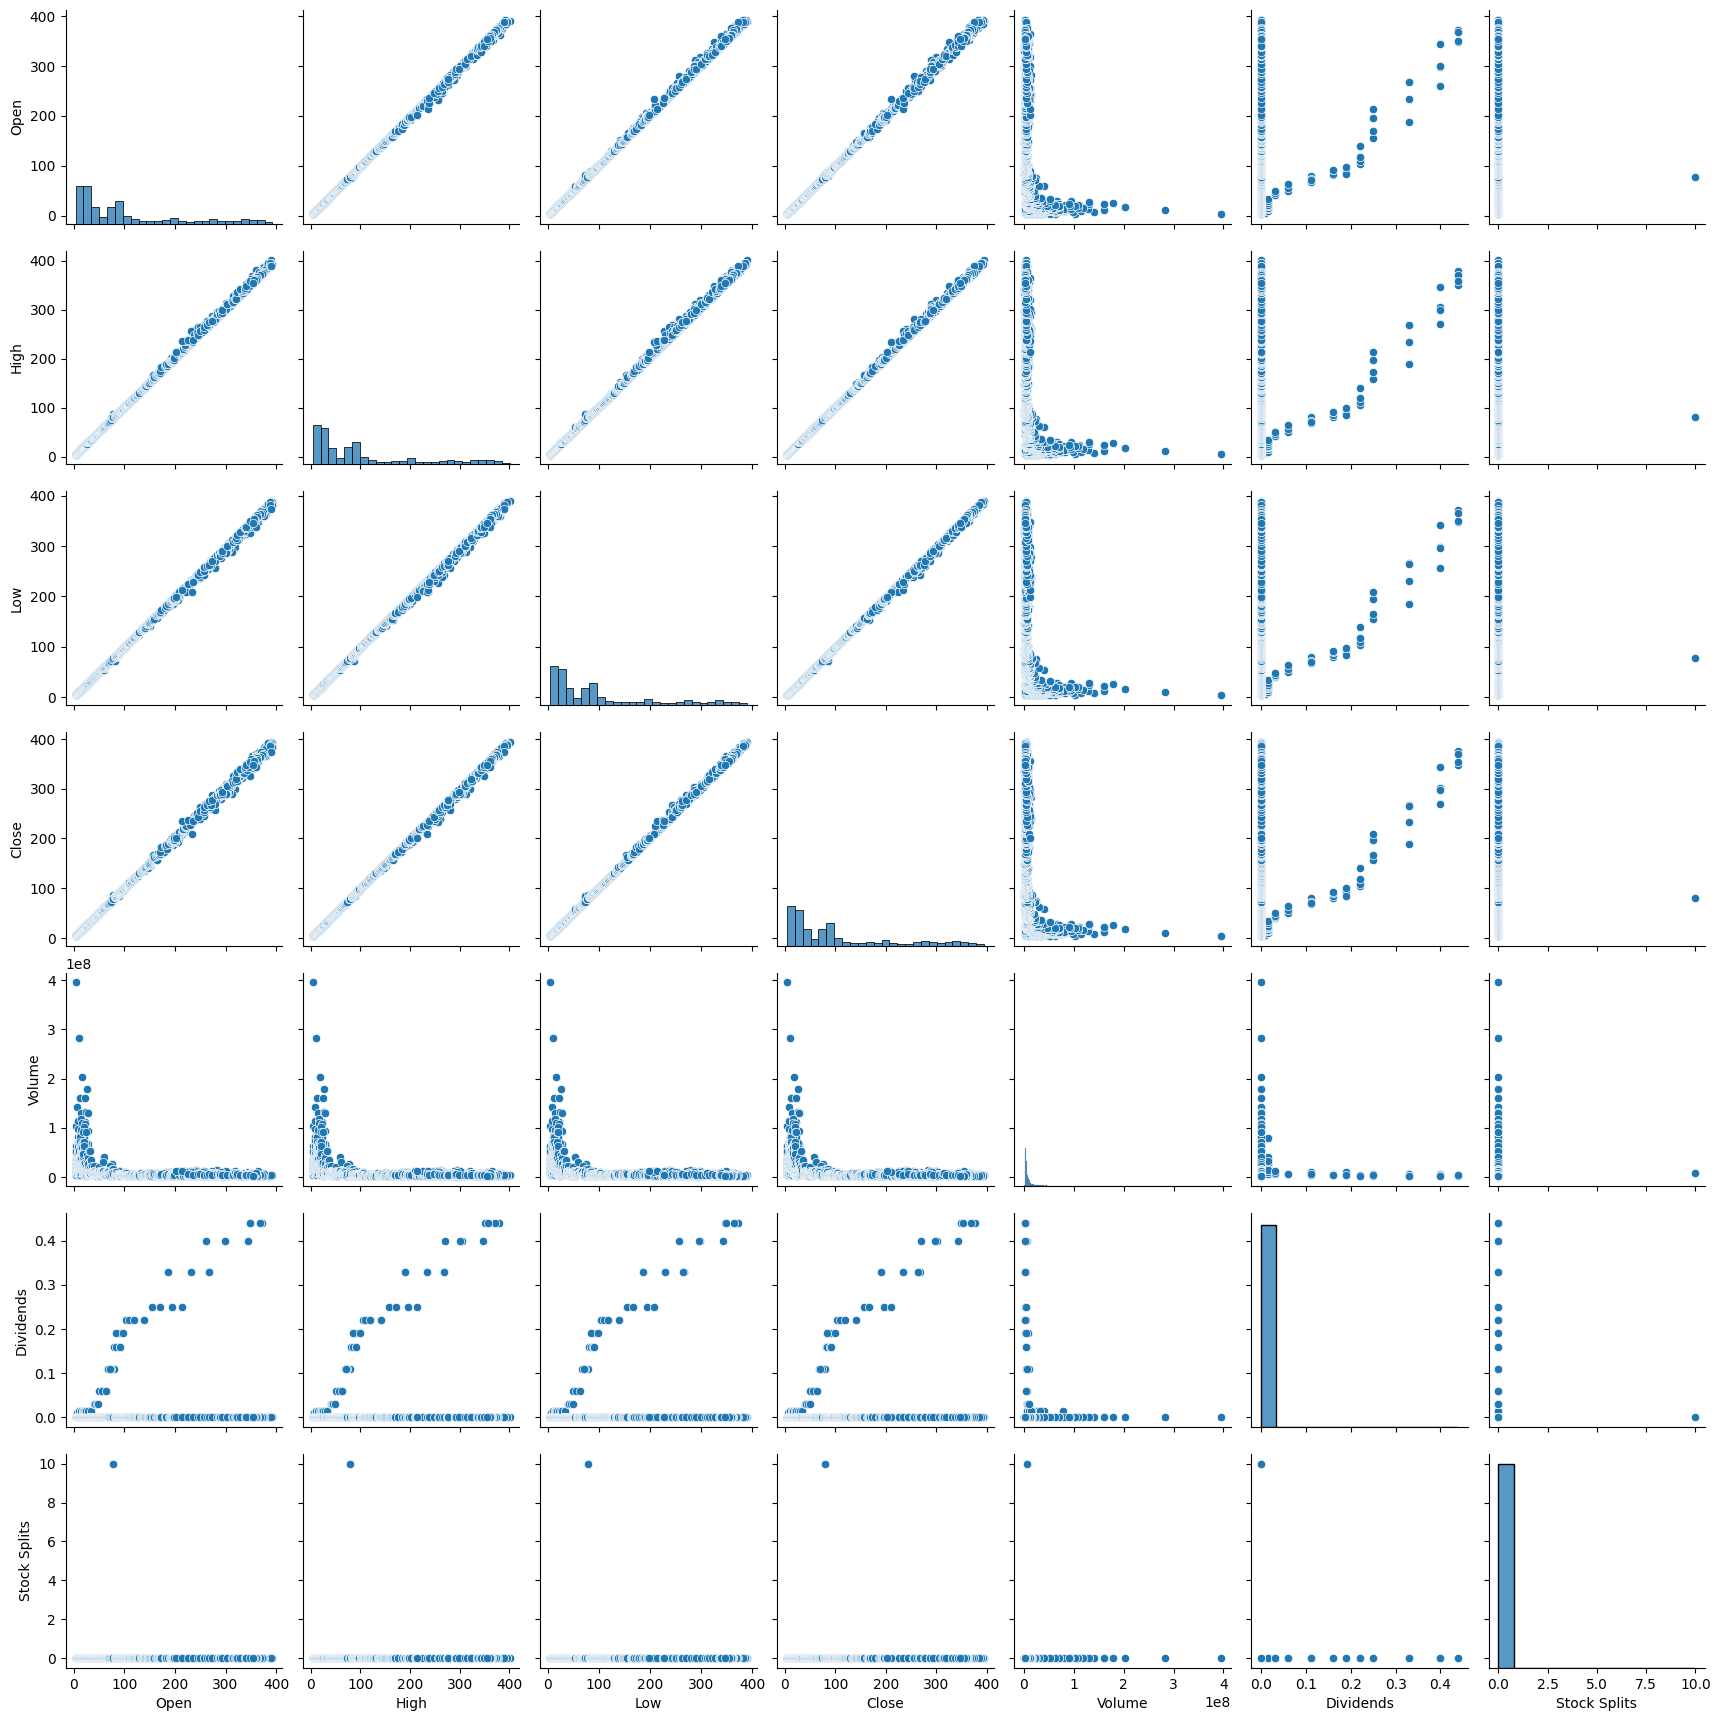

In [ ]:
sns.pairplot(data)

<Axes: >

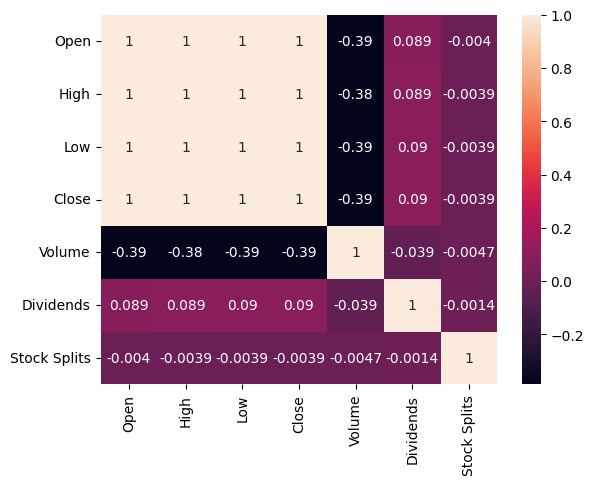

In [ ]:
sns.heatmap(correlation, annot = True)
# Biểu thị bảng dưới màu sắc

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Open', ylabel='Low'>

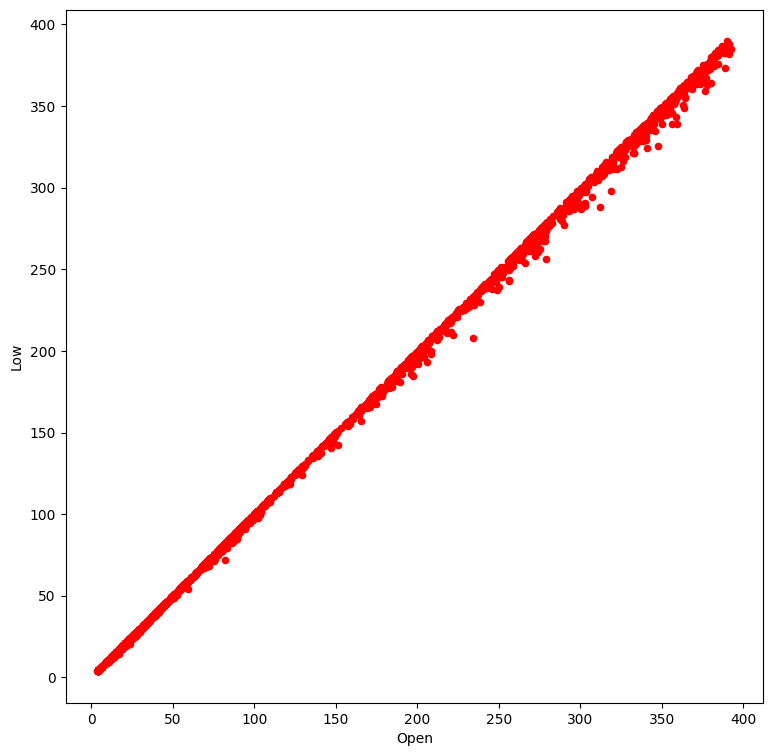

In [ ]:
## Salary & Level -> 0.82 (in corr)
data.plot(kind = 'scatter', x = 'Open', y = 'Low', figsize = (9,9),color = 'red')

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X = pd.DataFrame(data['Open']), y = data['Low']) 
print('Giá trị Interce: ',model.intercept_)
print('Giá trị Coeffient: ',model.coef_)
print('Độ chính xác của mô hình:', model.score(X= pd.DataFrame(data['Open']), y = data['Low']))

Giá trị Interce:  0.06651910433373587
Giá trị Coeffient:  [0.98861753]
Độ chính xác của mô hình: 0.9997356010415656


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


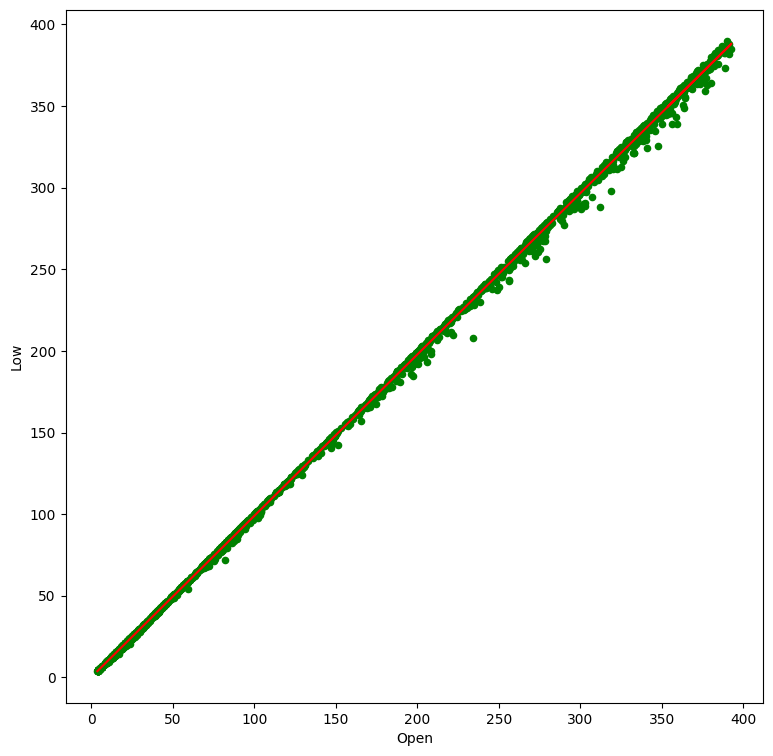

In [ ]:
data.plot(kind = 'scatter', x = 'Open', y = 'Low', figsize = (9,9), color = 'green')
y_pred = model.predict(X = pd.DataFrame(data['Open']))  #pred: Mũ
plt.plot(data['Open'], y_pred, color = 'red')

In [ ]:
model = linear_model.LinearRegression()
X = pd.DataFrame([data['Open'], data['Open']**2, data['Open']**3, data['Open']**4, data['Open']**5,
                  data['Open']**6]).T
model.fit(X, y = data['Low'])
print('Hệ số Intercept:', model.intercept_)
print('Hệ số Coeffient:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X, y = data['Low']))

Hệ số Intercept: -0.04978500053056223
Hệ số Coeffient: [ 9.80665228e-01  3.11378873e-04 -2.43981167e-06  6.26040678e-09
 -2.38984209e-12 -6.55909788e-15]
Độ chính xác của mô hình: 0.9997396727385499


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


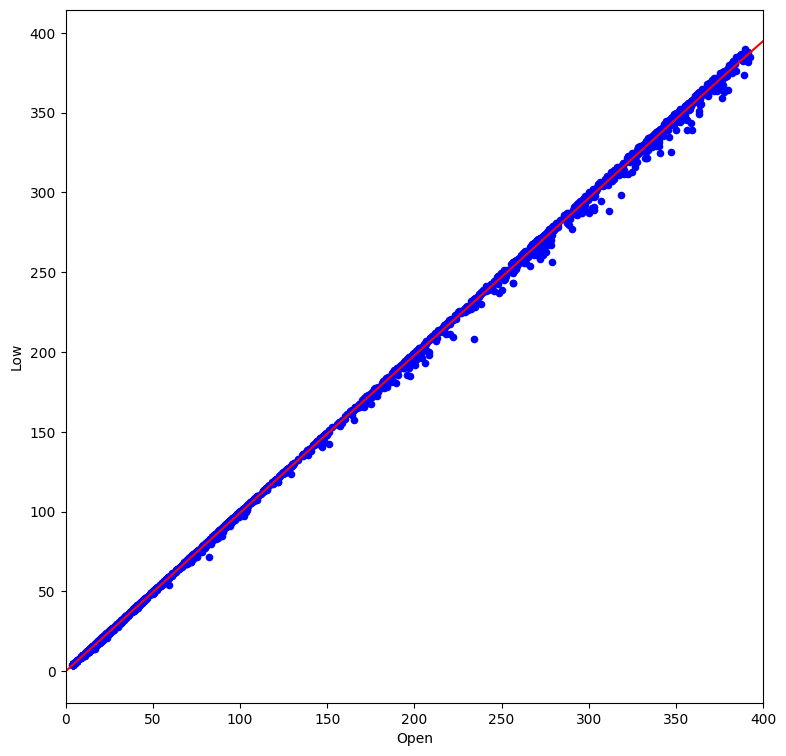

In [ ]:
range = np.arange(0, 400, 0.1)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5,
                        range**6]).T
y_pred = model.predict(X_range)
data.plot(kind = 'scatter', x = 'Open', y = 'Low', figsize = (9,9), color = 'blue', xlim = (0,400))
plt.plot(range, y_pred, color = 'red')

In [ ]:
model = linear_model.LinearRegression()
model.fit(X = data.loc[:,['Open','High','Close','Volume','Dividends','Stock Splits']], y = data['Low'])
print('Hệ số Intercept:', model.intercept_)
print('Hệ số Coeffient:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X = data.loc[:,['Open','High','Close','Volume','Dividends','Stock Splits']], y = data['Low']))

Hệ số Intercept: 0.13693484107017184
Hệ số Coeffient: [ 6.63088178e-01 -4.40565787e-01  7.70721437e-01 -6.54827931e-09
  1.06723519e+00  1.48461195e-02]
Độ chính xác của mô hình: 0.9999065771032277
